# Homework 4


Please follow the guidelines in Sec ***9. Homework Projects*** of the Syllabus. 

Homework projects must be submitted via Canvas as a *working* Jupyter notebook.

## Question 1

In this assignment, we would like to perform regression using the Hermite polynomials. 

Given the input data $\{x_k\}_{k=1}^n$ and $\{f_k = f(x_k)\}_{k=1}^n$, we want to find the coefficients $\{a_j\}_{j=1}^m$ such that the linear combination of [the Hermite polynomials](http://dlmf.nist.gov/18.5.E18) (recall that we used them in Module 4),
$$
    \sum_{j=1}^{m} a_j H_{j-1}(x)
$$
 approximates the input data. Following the discussion on the polynomial regression in Module 5, reformulate the following least square error minimization in the matrix form:

$$
    error^2 = \sum_{k=1}^n \left(\sum_{j=1}^m a_j H_{j - 1}(x_k) - f_k\right)^2 \to \min.
$$

$$
error^2 = \left\|
    \underbrace{\left\{\begin{pmatrix}
    1 & H_1(x_1) & H_2(x_1) & \ldots & H_{m-1}(x_1) \\
    1 & H_1(x_2) & H_2(x_2) & \ldots & H_{m-1}(x_2) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & H_1(x_n) & H_2(x_n) & \ldots & H_{m-1}(x_n) \\
\end{pmatrix}\right.}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_m 
\end{pmatrix}
-
\begin{pmatrix}
    f_1 \\
    f_2 \\
    \vdots \\
    f_n 
\end{pmatrix}
\right\|_2^2 \to \min,
$$

In [170]:

function poly_regression(x_given, f_given, m::Int, x_eval)
    
    @assert length(x_given) == length(f_given)
    
    n = length(x_given)
    
    H = ones(n, m)
    #H[:,1] = 1
    H[:, 2] = x_given .* 2
    H[:, 3] = 4 * x_given.^2 .- 2

    # for j = 3:m
       
    #        H[:, j] = 2 * x_given .* H[:, j-1] - (2 * (j - 2) * H[:, j - 2])
    # end
    
    a = H \ f_given
  
    P = zeros(length(x_eval))
    
    x_evalʲ⁻¹ = ones(length(x_eval))
    
    for j = 1:m
        P += a[j] *  x_evalʲ⁻¹
        x_evalʲ⁻¹ .*= x_eval
    end
    # P = H.*a-f_given
    
    return P
end

poly_regression (generic function with 1 method)

## Question 2

Using the input data from the class

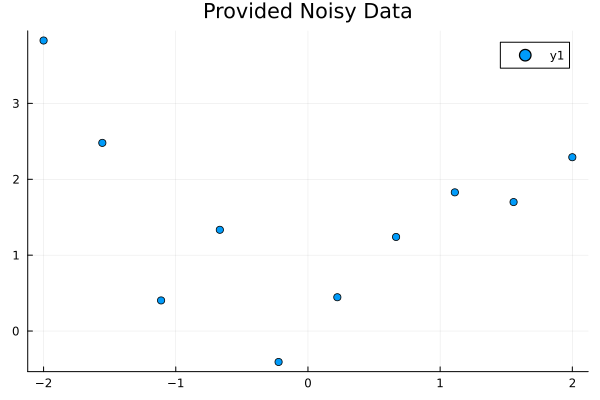

attempt to save state beyond implementation limit


In [171]:
using Random, Plots
Random.seed!(926491)

f_exact(x) = x ^ 2

x_given = range(-2, 2, 10)
f_given = f_exact.(x_given) + randn(length(x_given));
plt1=scatter(x_given, f_given,title="Provided Noisy Data")

and the formulation obtained in the previous question, numericaly perform the regression with the Hermite polynomials with $m=3$ and visualize the results.

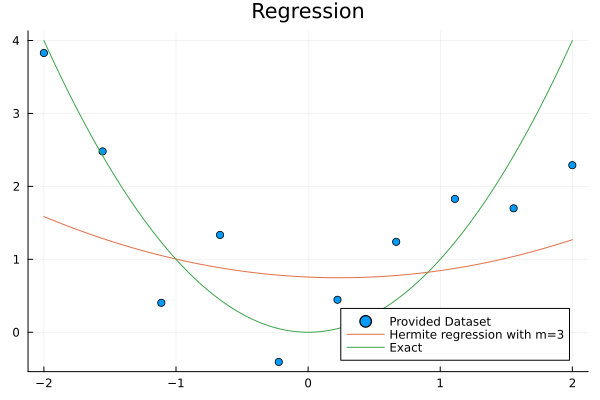

In [172]:
x_set=range(-2, 2, 100)
reg3_vals=poly_regression(x_given, f_given, 3, x_set)
# reg2_vals=poly_regression(x_given, f_given, 2, x_set)
# reg1_vals=poly_regression(x_given, f_given, 1, x_set)
pt1=scatter(x_given,f_given,label="Provided Dataset")
plot!(pt1,x_set,reg3_vals,label="Hermite regression with m=3",title="Regression")
plot!(pt1, x_set, x_set.^2, label="Exact")
# plot!(pt1, x_set, reg2_vals, label="m=2")
# plot!(pt1, x_set, regq_vals, label="m=1")


## Question 3: extra credit for 3170, required for 6170

In this problem we generalize the polynomial regression to two dimensions. Assume the input data is $\{(x_k, y_k)\}_{k=1}^n$ and $\{f_k\}_{k=1}^n$, and you are tasked to find the quadratic polynomial in the variables $x$ and $y$, 

$$
    f(x, y) = a_1 + x a_2 + y a_3 +  x ^2  a_4 + x y a_5 + y ^ 2 a_6,
$$

such that $f(x_k, y_k) \approx f_k$ in the least-squared error sense. Formulate this problem in the matrix form.

$$
f(x_k,y_k) = \begin{pmatrix}
    1 & x_1 & y_1 & x_1^2 & x_1y_1 & y_1^2 \\
    1 & x_2 & y_2 & x_2^2 & x_2y_2 & y_2^2\\
    \vdots &\vdots &\vdots &\vdots &\vdots &\vdots \\
    1 & x_n & y_n & x_n^2 & x_ny_n & y_n^2
\end{pmatrix}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_6 
\end{pmatrix}
$$

$f(x_k, y_k) \approx f_k$, where error is
$$
error^2 = \left\|
    \underbrace{\left\{\begin{pmatrix}
    1 & x_1 & y_1 & x_1^2 & x_1y_1 & y_1^2 \\
    1 & x_2 & y_2 & x_2^2 & x_2y_2 & y_2^2\\
    \vdots &\vdots &\vdots &\vdots &\vdots &\vdots \\
    1 & x_n & y_n & x_n^2 & x_ny_n & y_n^2
\end{pmatrix}\right.}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_6 
\end{pmatrix}
-
\begin{pmatrix}
    f_1 \\
    f_2 \\
    \vdots \\
    f_n 
\end{pmatrix}
\right\|_2^2 \to \min,
$$

## Question 4: extra credit for 3170, required for 6170

This problem illustrates an amazing power of the compressed sensing to recover a signal from very few measurements. Note that this example also demonstrates that the compressed sensing enables to violate the [Nyquist–Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) (we mentioned this theorem in Module 4).


At the following 3 time moments

In [4]:
t = [0.1; 0.5; 4];

you have measured the following 3 values of the signal $f(t)$:

In [5]:
f = [0.09375656034715878; -0.020392628892051068; -0.007207571158403585];

Assume that the sought signal is of the form
$$ 
	f(t)  = \sum_{j=1}^{10} a_j \cos(\omega_j t),	
$$
where the frequencies $\omega_j$ are

In [6]:
ω = [0.5186275255237416
 0.598900006650317
 0.724101203883798
 2.5919380553592983
 3.5523263008812735
 4.841064661245181
 5.1257568054024105
 5.780984198895995
 9.035675495024725
 9.484705207866547];

and all but one $a_j$ are zero. Find which one of $\{a_j\}_{j=1}^{10}$ is non-zero?

*Hint:* First, formulate the problem of finding the unknown coefficients $\{a_j\}_{j=1}^{10}$ as a regression problem in the matrix form.  Then, use the compressed sensing to solve it with different values of $\alpha$ and carefully observe the pattern.